In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# create two dimensional correlated data
np.random.seed(0)
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=500)
data = pd.DataFrame(data, columns=['x', 'y'])
data.head()




,x,y
0,-4.043801,-1.574511
1,-3.146465,0.932162
2,-3.654563,-2.919911
3,-2.013850,-1.176148
4,0.042516,0.480321


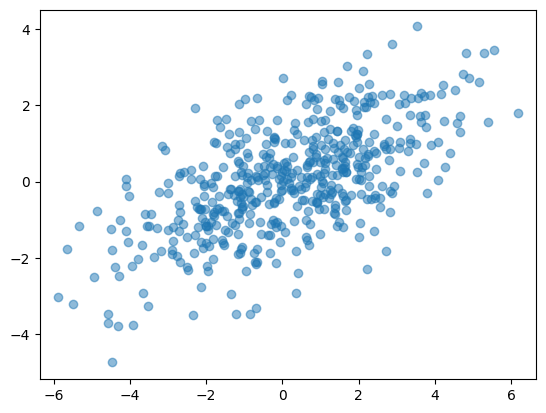

In [3]:
# plot the data
plt.scatter(data['x'], data['y'], alpha=0.5)
plt.axis('equal')
plt.show()


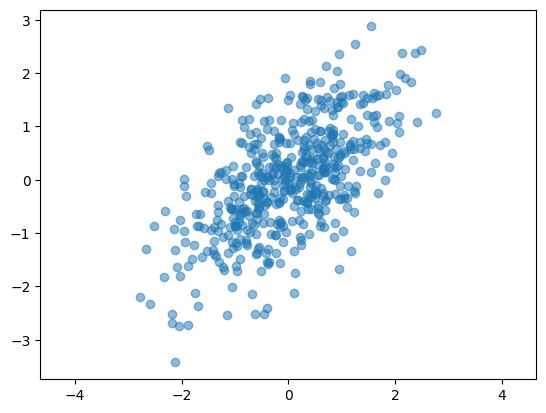

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data)

plt.scatter(data_standardized[:,0], data_standardized[:,1], alpha=0.5)
plt.axis('equal')
plt.show()

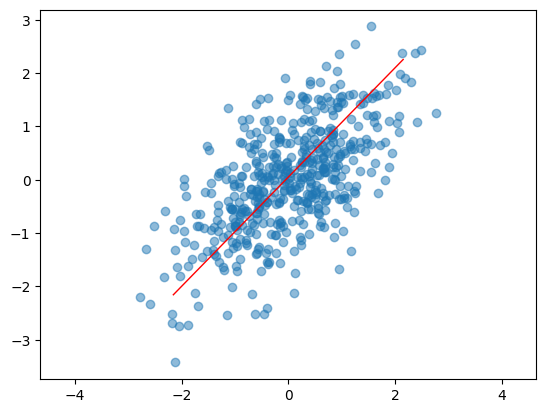

In [5]:
# Plot first principal component
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
# standardize the data

pca.fit(data_standardized)
first_pc = pca.components_[0]
plt.scatter(data_standardized[:,0], data_standardized[:,1], alpha=0.5)
plt.axis('equal')
xlim = plt.xlim()
ylim = plt.ylim()
plt.plot([first_pc[0]*xlim[0], first_pc[0]*xlim[1]], [first_pc[1]*xlim[0], first_pc[1]*ylim[1]], color='red', lw=1)
plt.show()



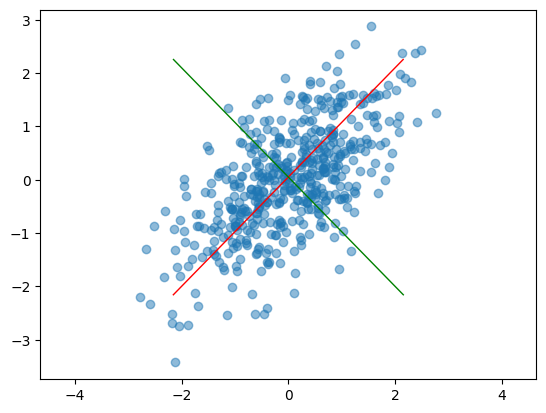

In [6]:
plt.scatter(data_standardized[:,0], data_standardized[:,1], alpha=0.5)
plt.axis('equal')
plt.plot([first_pc[0]*xlim[0], first_pc[0]*xlim[1]], [first_pc[1]*xlim[0], first_pc[1]*ylim[1]], color='red', lw=1)
# plot second principal component
second_pc = pca.components_[1]
plt.plot([second_pc[0]*xlim[0], second_pc[0]*xlim[1]], [second_pc[1]*xlim[0], second_pc[1]*ylim[1]], color='green', lw=1)
plt.show()

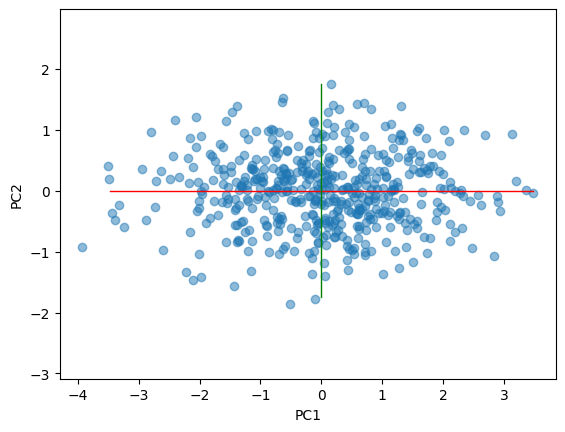

In [7]:
# Rotate the data
data_rotated = np.dot(data_standardized, pca.components_.T)
max_x = max(data_rotated[:,0])
max_y = max(data_rotated[:,1])

plt.scatter(data_rotated[:,0], data_rotated[:,1], alpha=0.5)
plt.axis('equal')
# plot first principal component
plt.plot([-max_x, max_x], [0, 0], color='red', lw=1)

# plot second principal component
plt.plot([0, 0], [-max_y, max_y], color='green', lw=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

c:\Users\vinor\Desktop\Develhope\projects\EDU-PCA\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


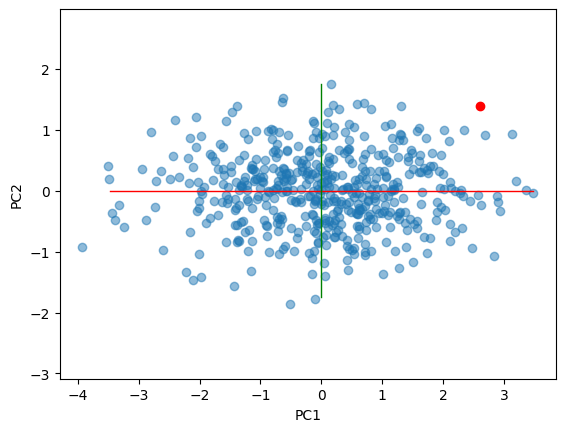

In [8]:
# create and plot one new data point
new_data = np.array([[2, 4]])
new_data_standardized = scaler.transform(new_data)
new_data_rotated = np.dot(new_data_standardized, pca.components_.T)
 #plot it
plt.scatter(data_rotated[:,0], data_rotated[:,1], alpha=0.5)
plt.axis('equal')
plt.plot(new_data_rotated[0,0], new_data_rotated[0,1], 'or')
plt.plot([-max_x, max_x], [0, 0], color='red', lw=1)
plt.plot([0, 0], [-max_y, max_y], color='green', lw=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


In [9]:
# import the dataset
df = pd.read_csv('data/Phone.csv')
df = df.dropna()
df.head()

,phone_name,brand,os,inches,resolution,battery,battery_type,ram(GB),announcement_date,weight(g),...,video_1080p,video_4K,video_8K,video_30fps,video_60fps,video_120fps,video_240fps,video_480fps,video_960fps,price(USD)
0,Y6II Compact,Huawei,Android 5.1,5.0,720x1280,2200,Li-Po,2,2016-09-01,140.0,...,False,False,False,True,False,False,False,False,False,120.0
1,K20 plus,LG,Android 7.0,5.3,720x1280,2700,Li-Ion,2,2016-12-01,140.0,...,True,False,False,True,False,False,False,False,False,100.0
2,P8 Lite (2017),Huawei,Android 7.0,5.2,1080x1920,3000,Li-Ion,4,2017-01-01,147.0,...,True,False,False,True,False,False,False,False,False,420.0
3,Redmi Note 4,Xiaomi,Android 6.0,5.5,1080x1920,4100,Li-Po,4,2017-01-01,165.0,...,True,False,False,True,False,True,False,False,False,150.0
4,P10,Huawei,Android 7.0,5.1,1080x1920,3200,Li-Ion,4,2017-02-01,145.0,...,True,True,False,True,True,False,False,False,False,420.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   phone_name         1512 non-null   object 
 1   brand              1512 non-null   object 
 2   os                 1512 non-null   object 
 3   inches             1512 non-null   float64
 4   resolution         1512 non-null   object 
 5   battery            1512 non-null   int64  
 6   battery_type       1512 non-null   object 
 7   ram(GB)            1512 non-null   int64  
 8   announcement_date  1512 non-null   object 
 9   weight(g)          1512 non-null   float64
 10  storage(GB)        1512 non-null   int64  
 11  video_720p         1512 non-null   bool   
 12  video_1080p        1512 non-null   bool   
 13  video_4K           1512 non-null   bool   
 14  video_8K           1512 non-null   bool   
 15  video_30fps        1512 non-null   bool   
 16  video_60fps        1512 

In [11]:
# Transform the data
df['resolution'] = df['resolution'].str.replace('x', '*').map(eval)


In [12]:

# Convert all the boolean columns to integers
mask = df.dtypes == bool
# Select the boolean columns
bool_cols = df.columns[mask]
# Convert the boolean columns to integers
df[bool_cols] = df[bool_cols].astype(int)
df.head()

,phone_name,brand,os,inches,resolution,battery,battery_type,ram(GB),announcement_date,weight(g),...,video_1080p,video_4K,video_8K,video_30fps,video_60fps,video_120fps,video_240fps,video_480fps,video_960fps,price(USD)
0,Y6II Compact,Huawei,Android 5.1,5.0,921600,2200,Li-Po,2,2016-09-01,140.0,...,0,0,0,1,0,0,0,0,0,120.0
1,K20 plus,LG,Android 7.0,5.3,921600,2700,Li-Ion,2,2016-12-01,140.0,...,1,0,0,1,0,0,0,0,0,100.0
2,P8 Lite (2017),Huawei,Android 7.0,5.2,2073600,3000,Li-Ion,4,2017-01-01,147.0,...,1,0,0,1,0,0,0,0,0,420.0
3,Redmi Note 4,Xiaomi,Android 6.0,5.5,2073600,4100,Li-Po,4,2017-01-01,165.0,...,1,0,0,1,0,1,0,0,0,150.0
4,P10,Huawei,Android 7.0,5.1,2073600,3200,Li-Ion,4,2017-02-01,145.0,...,1,1,0,1,1,0,0,0,0,420.0


In [13]:
# Standardize the data
scaler = StandardScaler()
# Select numerical columns
df = df.select_dtypes(include=[np.number])
df_standardized = scaler.fit_transform(df)
df_standardized = pd.DataFrame(df_standardized, columns=df.columns)
df_standardized.head()

,inches,resolution,battery,ram(GB),weight(g),storage(GB),video_720p,video_1080p,video_4K,video_8K,video_30fps,video_60fps,video_120fps,video_240fps,video_480fps,video_960fps,price(USD)
0,-2.982814,-1.499978,-2.791873,-1.734417,-1.818771,-1.252014,0.923548,-12.922848,-1.061406,-0.245578,0.3488,-0.773504,-0.609960,-0.392681,-0.153937,-0.414841,-0.816969
1,-2.353732,-1.499978,-2.154401,-1.734417,-1.818771,-1.252014,-1.082781,0.077382,-1.061406,-0.245578,0.3488,-0.773504,-0.609960,-0.392681,-0.153937,-0.414841,-0.891973
2,-2.563426,-0.313161,-1.771917,-0.993825,-1.551508,-1.252014,-1.082781,0.077382,-1.061406,-0.245578,0.3488,-0.773504,-0.609960,-0.392681,-0.153937,-0.414841,0.308090
3,-1.934344,-0.313161,-0.369478,-0.993825,-0.864261,-1.036994,0.923548,0.077382,-1.061406,-0.245578,0.3488,-0.773504,1.639453,-0.392681,-0.153937,-0.414841,-0.704464
4,-2.773120,-0.313161,-1.516928,-0.993825,-1.627869,-1.036994,0.923548,0.077382,0.942147,-0.245578,0.3488,1.292818,-0.609960,-0.392681,-0.153937,-0.414841,0.308090


In [14]:
# Fit the PCA
pca = PCA(n_components=df_standardized.shape[1])
pca.fit(df_standardized)


PCA(n_components=17)

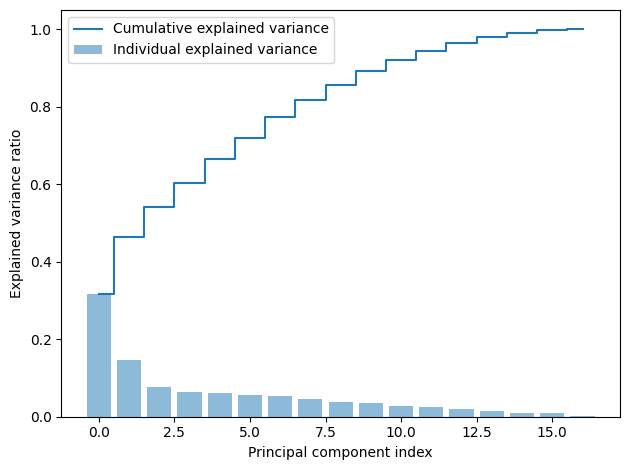

In [15]:
exp_var_pca = pca.explained_variance_ratio_
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

# Create the visualization plot
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

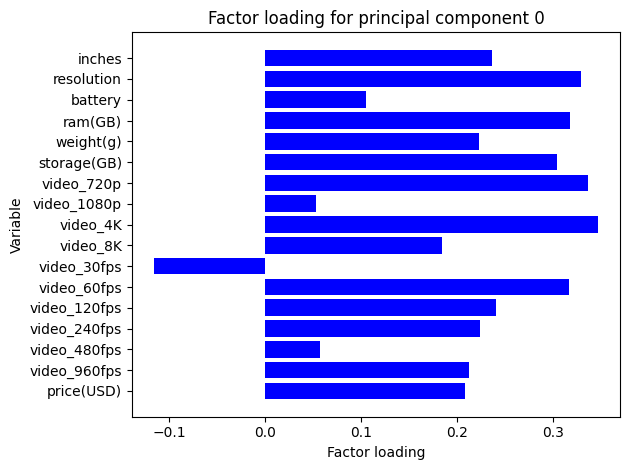

In [16]:
# For all the principal components plot variable factor loadings
def display_factor_loading(pca, comp):
    num_vars = len(df.columns)
    plt.barh(range(num_vars), pca.components_[comp], color='b', align='center')
    plt.yticks(np.arange(num_vars), df.columns)
    plt.xlabel('Factor loading')
    plt.ylabel('Variable')
    plt.gca().invert_yaxis()
    plt.title('Factor loading for principal component ' + str(comp))
    plt.tight_layout()
    plt.show()

# Display factor loading for the first principal component
display_factor_loading(pca, 0)



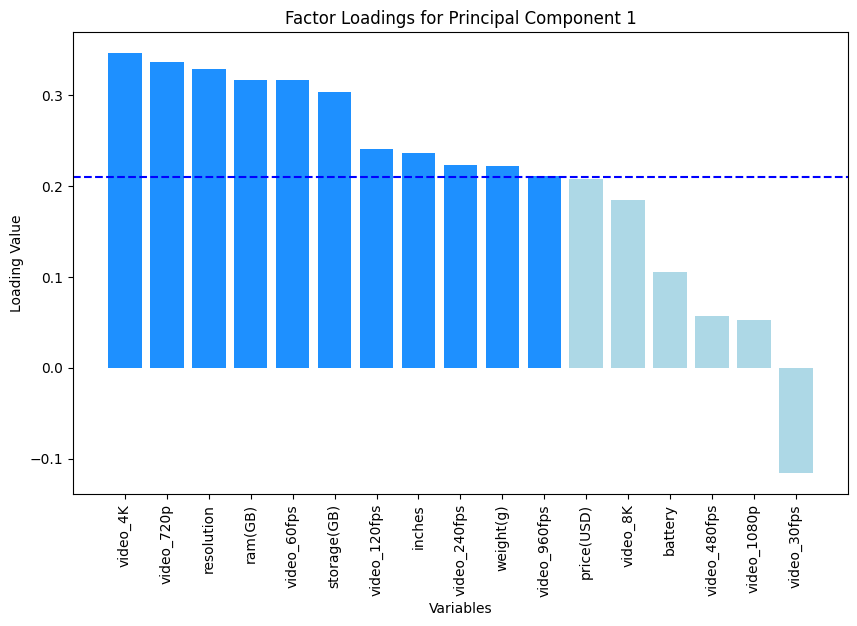

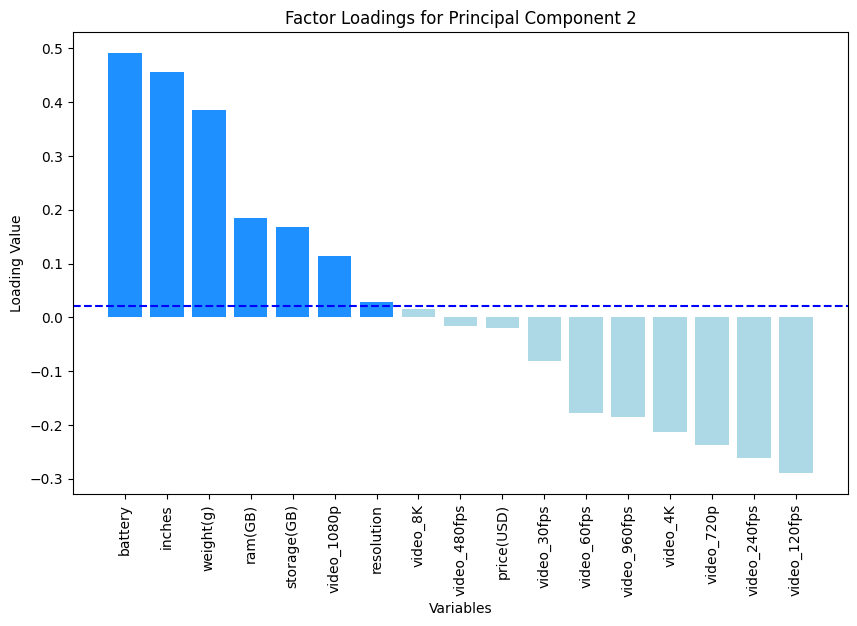

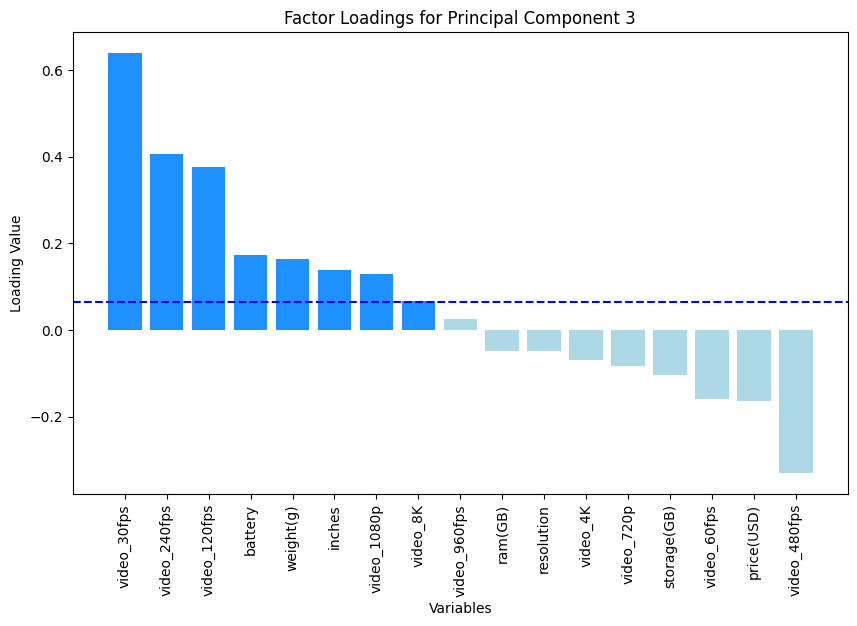

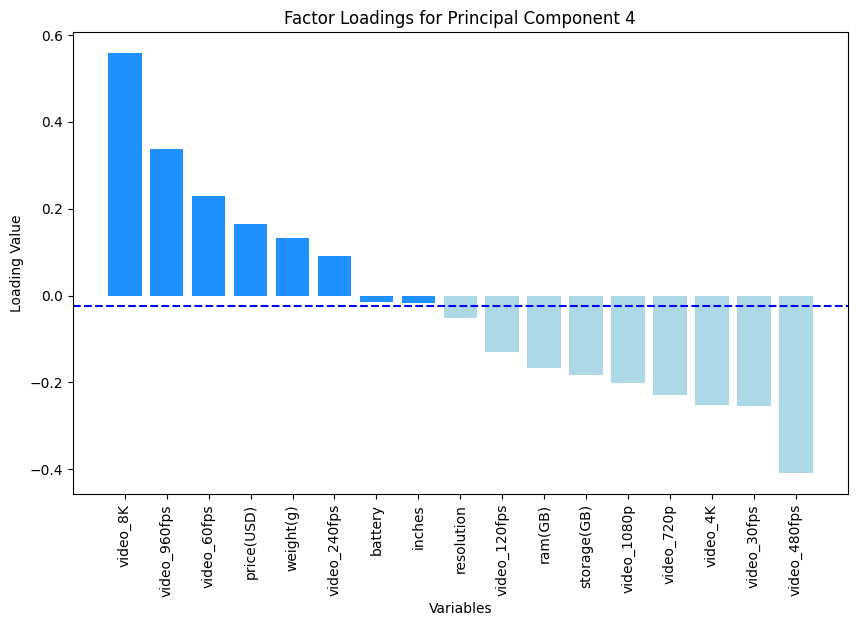

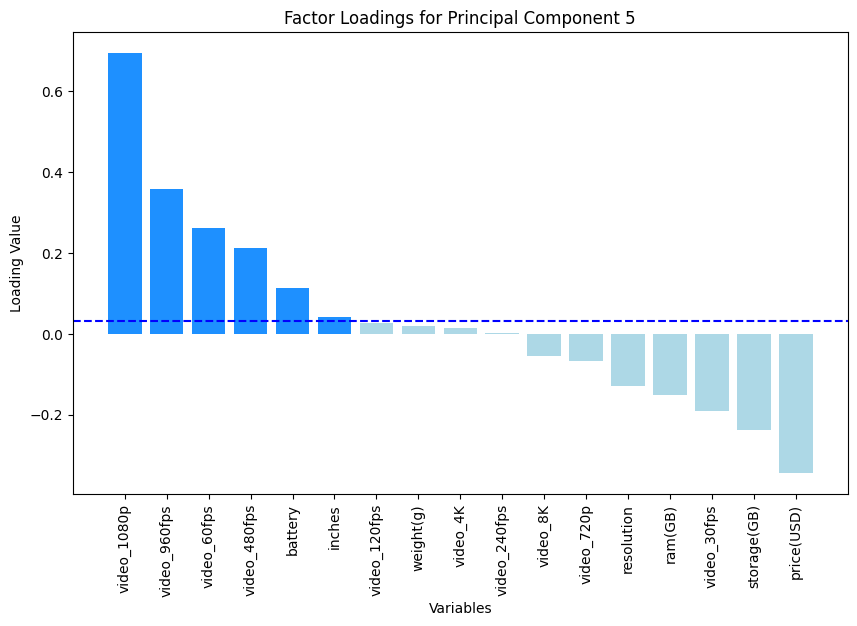

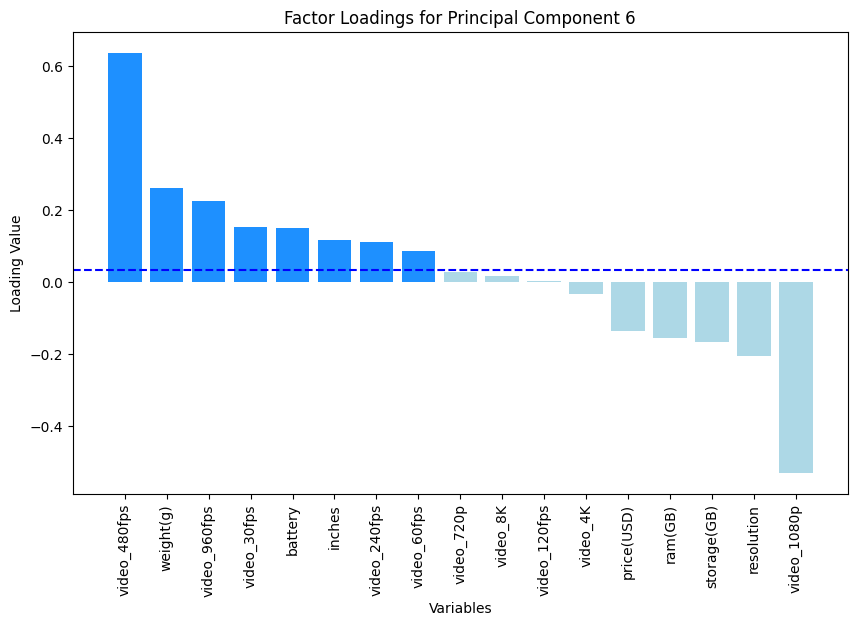

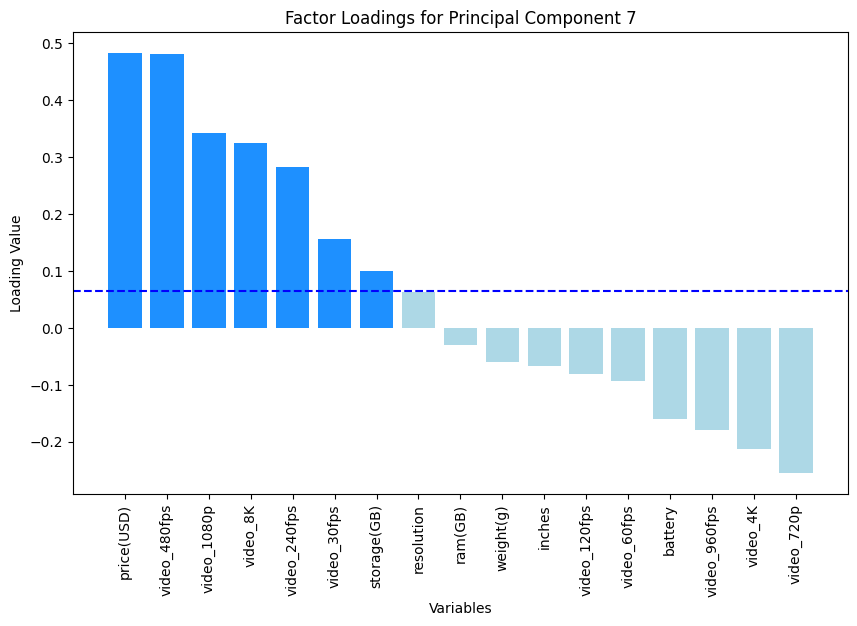

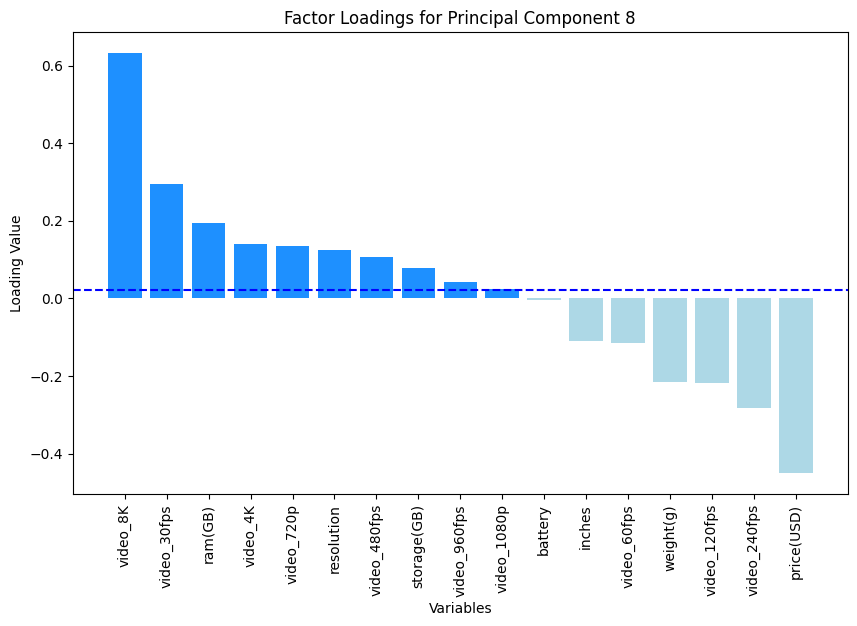

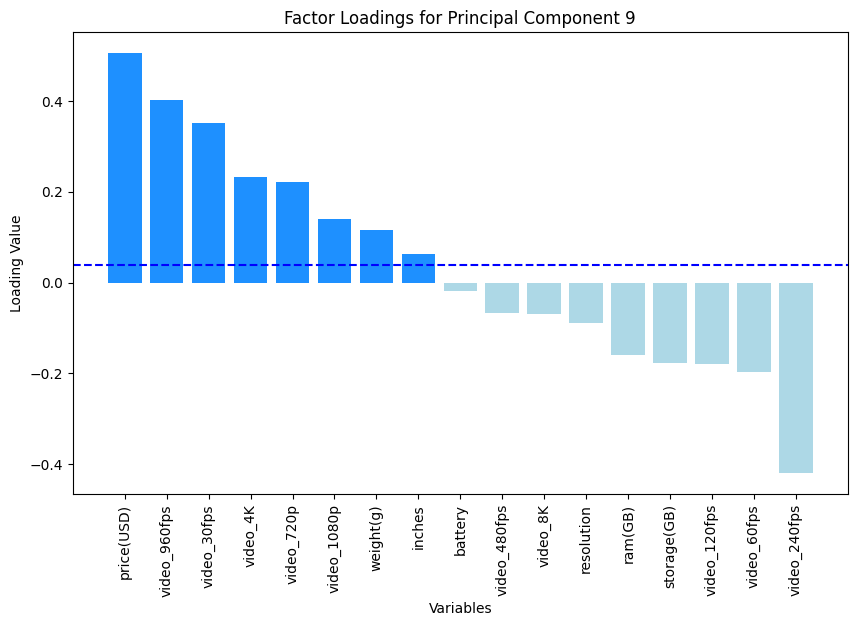

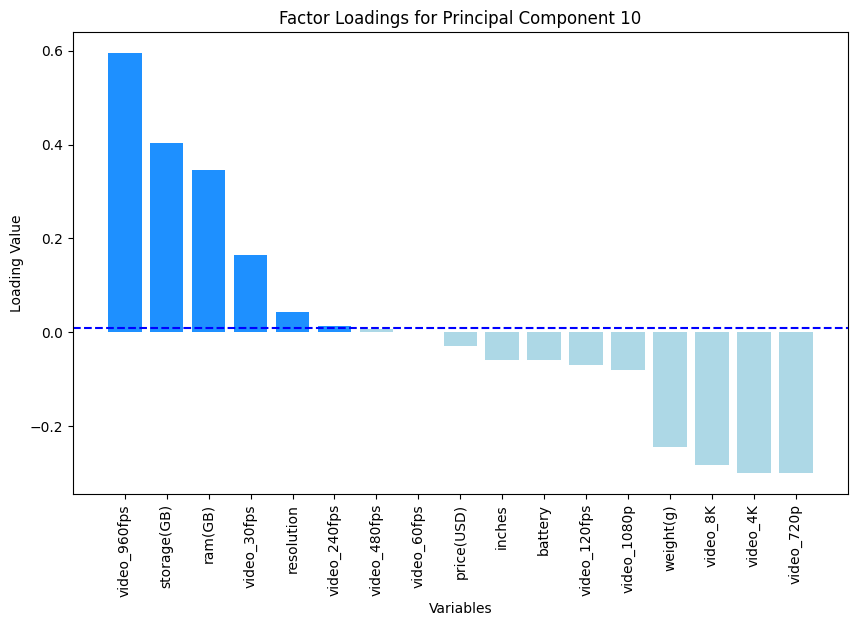

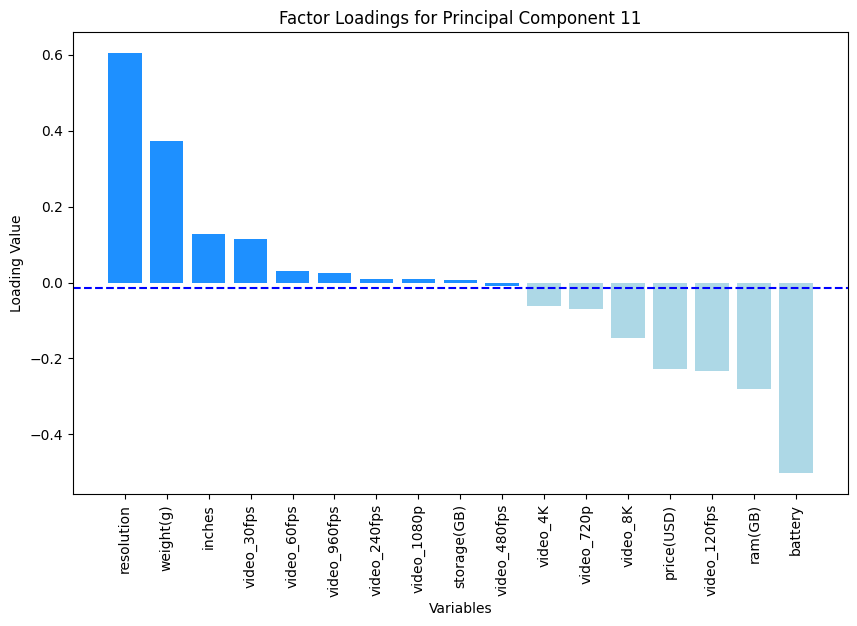

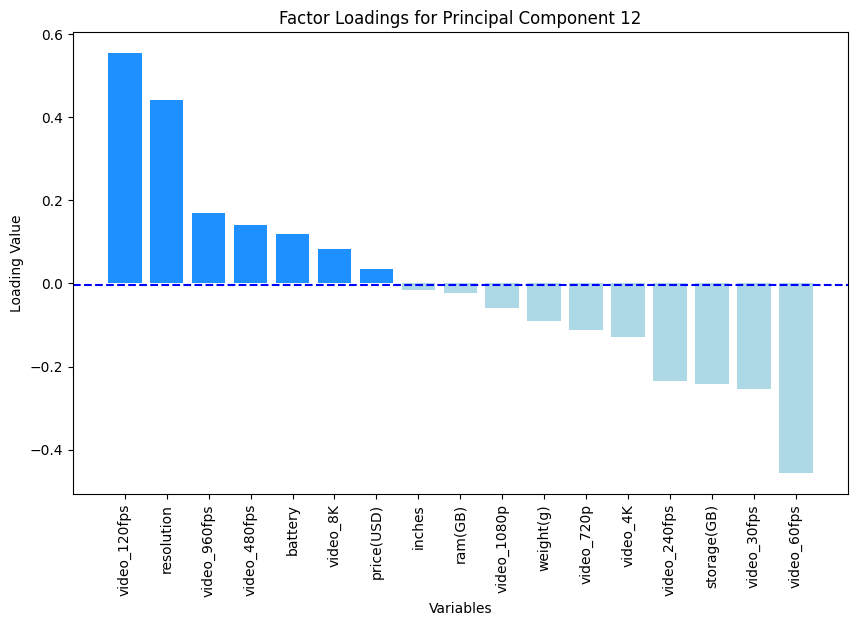

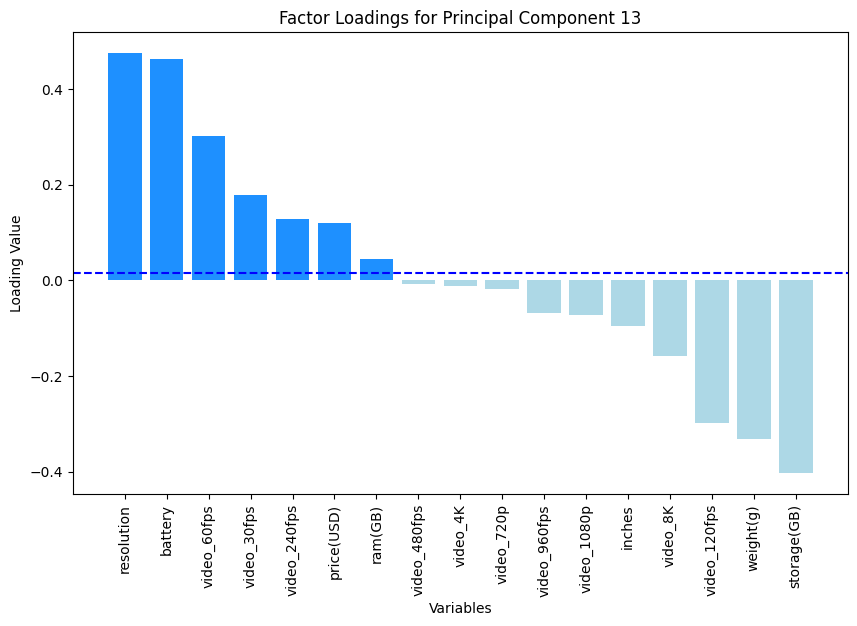

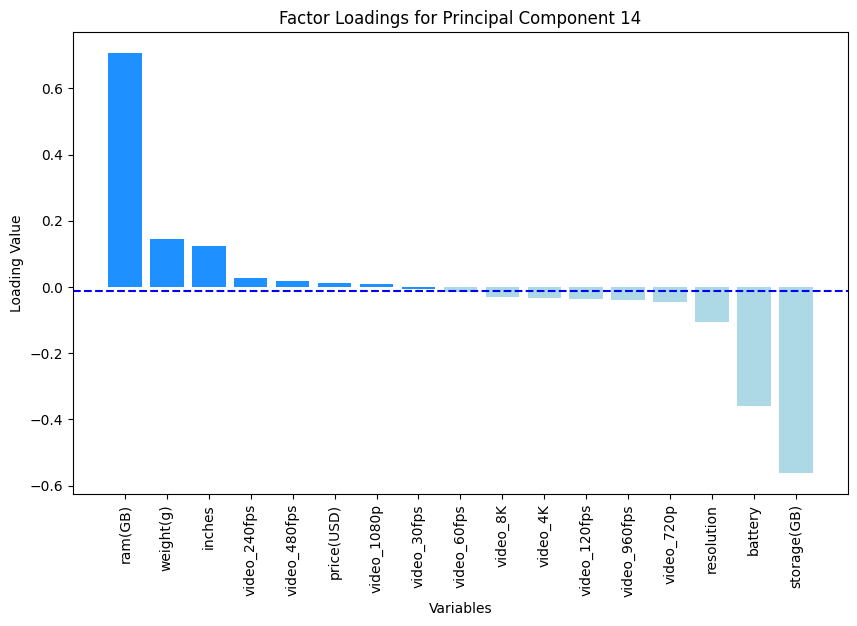

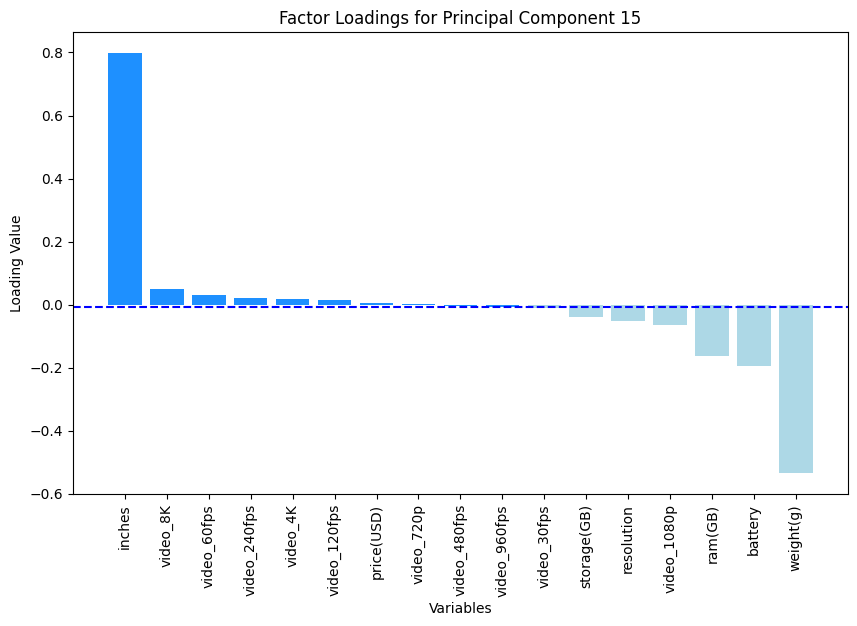

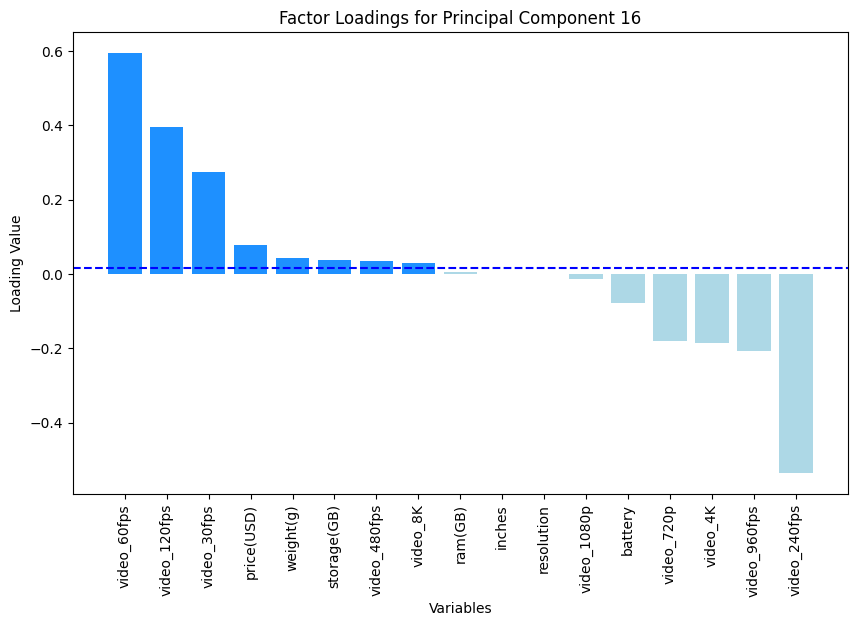

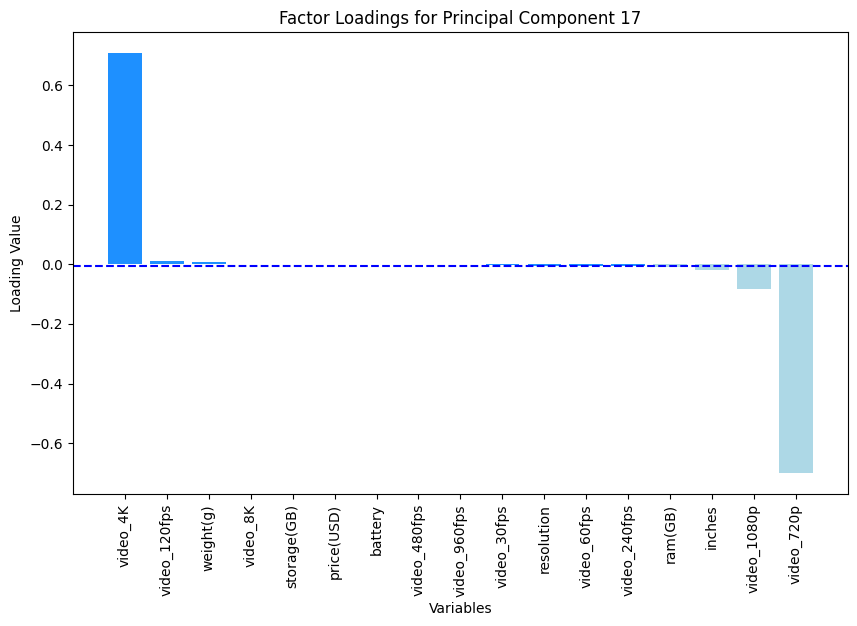

In [23]:
loadings = pca.components_.T

# Step 3: Plotting
num_components = loadings.shape[1]
for i in range(num_components):
    sorted_idx = np.argsort(loadings[:, i])[::-1]
    sorted_loadings = loadings[sorted_idx, i]
    vars = df.columns[sorted_idx]
    mean_loading = np.mean(sorted_loadings)
    
    # Colors based on comparison with the mean
    colors = ['dodgerblue' if loading >= mean_loading else 'lightblue' for loading in sorted_loadings]
    
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(sorted_loadings)), sorted_loadings, color=colors)
    plt.title(f'Factor Loadings for Principal Component {i+1}')
    plt.xticks(range(len(sorted_loadings)), vars, rotation=90)
    plt.xlabel('Variables')
    plt.ylabel('Loading Value')
    plt.axhline(mean_loading, color='blue', linestyle='--')
    plt.show()